# 实践实验室：线性回归

欢迎来到你的第一个实践实验室！在本实验中，你将使用一个变量实现线性回归，以预测餐厅特许经营的利润。

# 大纲
- [ 1 - 包 ](#1)
- [ 2 - 单变量线性回归 ](#2)
  - [ 2.1 问题描述](#2.1)
  - [ 2.2  数据集](#2.2)
  - [ 2.3 复习线性回归](#2.3)
  - [ 2.4  计算损失](#2.4)
    - [ 练习 1](#ex01)
  - [ 2.5 梯度下降 ](#2.5)
    - [ 练习 2](#ex02)
  - [ 2.6 使用批量梯度下降法学习参数 ](#2.6)


<a name="1"></a>
## 1 - 包

首先，让我们运行下面的单元格来导入你在此分配期间需要的所有包。
- [numpy](www.numpy.org) 是在 Python 中处理矩阵的基本包。
- [matplotlib](http://matplotlib.org) 是一个著名的 Python 绘图库。
- ``utils.py`` 包含此分配的辅助函数。你无需修改此文件中的代码。


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math
%matplotlib inline

## 2 -  问题描述

假设你是一家连锁餐厅的 CEO，并且正在考虑在不同的城市开设一家新店。
- 你想将业务扩展到可能为你的餐厅带来更高利润的城市。
- 该连锁店已经在各个城市开设了餐厅，并且你拥有来自城市的利润和人口数据。
- 你还拥有作为新餐厅候选城市的数据。
    - 对于这些城市，你拥有城市人口。
    
你能否使用这些数据来帮助你确定哪些城市可能会给你的企业带来更高的利润？

## 3 - 数据集

首先，你将为此任务加载数据集。
- `load_data()` 函数将如下所示的数据加载到变量 `x_train` 和 `y_train`
  - `x_train` 是一个城市的人口
  - `y_train` 是那个城市一家餐馆的利润。利润为负值表示亏损。
  - `X_train` 和 `y_train` 都是 numpy 的数组。

In [2]:
# load the dataset
x_train, y_train = load_data()

#### 查看变量
在开始任何任务之前，熟悉你的数据集是很有用且必要的。
- 一个好的开始————打印出每个变量并查看它包含的内容。

下面的代码打印变量 `x_train` 和变量的类型。

In [3]:
# print x_train
print("Type of x_train:",type(x_train))
print("First five elements of x_train are:\n", x_train[:5]) 

Type of x_train: <class 'numpy.ndarray'>
First five elements of x_train are:
 [6.1101 5.5277 8.5186 7.0032 5.8598]


`x_train` 是一个 numpy 数组，其中包含所有大于零的十进制值。
- 这些值代表城市人口乘以 10,000
- 例如，6.1101 表示该城市的人口为 61,101
  
现在，让我们打印 `y_train`

In [4]:
# print y_train
print("Type of y_train:",type(y_train))
print("First five elements of y_train are:\n", y_train[:5])  

Type of y_train: <class 'numpy.ndarray'>
First five elements of y_train are:
 [17.592   9.1302 13.662  11.854   6.8233]


类似地, `y_train` 是一个含有十进制值的numpy数组，有些是负数，有些是正数。
- 这些代表你的餐厅在每个城市的平均月利润，单位为 10,000 美元。
  - 例如，17.592 代表该城市的平均月利润为 175,920 美元。
  - -2.6807代表该城市每月平均亏损26807美元。

#### 检查变量的维度

另一种熟悉数据的有用方法是查看其维度。

请打印 `x_train` 和 `y_train` 的形状，并查看你的数据集中有多少训练示例。

In [5]:
print ('The shape of x_train is:', x_train.shape)
print ('The shape of y_train is: ', y_train.shape)
print ('Number of training examples (m):', len(x_train))

The shape of x_train is: (97,)
The shape of y_train is:  (97,)
Number of training examples (m): 97


城市人口数组有97个数据点，月平均利润也有97个数据点。这些是 Num Py 一维数组。

#### 可视化你的数据

通过可视化数据来理解数据通常很有用。
- 对于此数据集，你可以使用散点图来可视化数据，因为它只有两个要绘制的属性（利润和人口）。
- 你在现实生活中会遇到的很多其他问题都有两个以上的属性（例如人口、家庭平均收入、月利润、月销售额）。当你有两个以上的属性时，你仍然可以使用散点图来查看每对属性之间的关系。


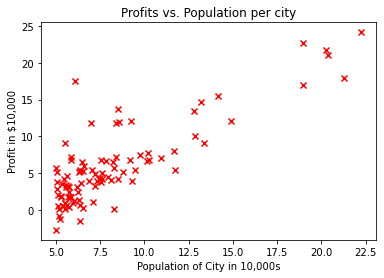

In [6]:
# Create a scatter plot of the data. To change the markers to red "x",
# we used the 'marker' and 'c' parameters
plt.scatter(x_train, y_train, marker='x', c='r') 

# Set the title
plt.title("Profits vs. Population per city")
# Set the y-axis label
plt.ylabel('Profit in $10,000')
# Set the x-axis label
plt.xlabel('Population of City in 10,000s')
plt.show()

你的目标是建立一个线性回归模型来拟合这些数据。
- 使用此模型，你可以输入一个新城市的人口，并让模型估算你的餐厅在该城市的潜在月利润。

<a name="4"></a>
## 4 - 复习线性回归

在这个实践实验室中，你将把线性回归参数$(w,b)$拟合到你的数据集。
- 线性回归的模型函数，它是一个从 `x` （城市人口）映射到 `y` （你的餐厅在该城市的月利润）的函数，表示为 $$f_{w,b}(x) = wx + b$$
    

- 为了训练线性回归模型，你需要找到适合你的数据集的最佳 $(w,b)$ 参数。 

    - 如果你想比较$(w,b)$的优劣，你可以用损失函数$J(w,b)$来评估它。
      - $J$ 是一个关于 $(w,b)$ 的函数。也就是说， 损失函数 $J(w,b)$ 的值取决于 $(w,b)$ 的值。
  
    - 拟合 $(w,b)$ 最好的选择就是最小的损失 $J(w,b)$.


- 要找到获得最小可能成本 $J(w,b)$ 的值 $(w,b)$，你可以使用一种称为**梯度下降**的方法。
  - 随着梯度下降的每一步，你的参数 $(w,b)$ 会更接近实现最低成本 $J(w,b)$ 的最优值。
  

- 然后，经过训练的线性回归模型可以采用输入特征 $x$（城市人口）并输出预测 $f_{w,b}(x)$（预测该城市餐厅的月利润）。

<a name="5"></a>
## 5 - 计算损失

梯度下降涉及重复步骤来调整参数 $(w,b)$ 的值，以逐渐获得越来越小的成本 $J(w,b)$。
- 在梯度下降的每一步，通过计算 $(w,b)$ 更新时的成本 $J(w,b)$ 来监控你的进度会很有帮助。
- 在本节中，你将实现一个函数来计算 $J(w,b)$，以便你可以检查梯度下降实现的进度。

#### 损失函数
你可能还记得，对于一个变量，线性回归 $J(w,b)$ 的成本函数定义为

$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$ 

- 你可以将 $f_{w,b}(x^{(i)})$ 视为模型对餐厅利润的预测，而不是 $y^{(i)}$，后者是实际利润记录在数据中。
- $m$ 是数据集中训练示例的数量

#### 模型预测

- 对于单变量线性回归，以$x^{(i)}$为例，模型$f_{w,b}$的预测为:

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b$$

这是一条直线的方程，截距为 $b$，斜率为 $w$

#### 实现

请完善下方的 `compute_cost()` 函数来计算损失 $J(w,b)$.

<a name="ex01"></a>
### 练习 1

通过完善下方的 `compute_cost` :

* 迭代训练示例，并为每个示例计算：
    * 该示例的模型预测
    $$
    f_{wb}(x^{(i)}) =  wx^{(i)} + b 
    $$
   
    * 该示例的损失  $$cost^{(i)} =  (f_{wb} - y^{(i)})^2$$
    

* 返回所有示例的总成本
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} cost^{(i)}$$
  * 这里, $m$ 是训练示例的数量， $\sum$ 是求和算子

如果你遇到困难，你可以查看下面单元格后提供的提示，以帮助你实施。

In [10]:
# UNQ_C1
# GRADED FUNCTION: compute_cost

def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression.
    
    Args:
        x (ndarray): Shape (m,) Input to the model (Population of cities) 
        y (ndarray): Shape (m,) Label (Actual profits for the cities)
        w, b (scalar): Parameters of the model
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0] 
    
    # You need to return this variable correctly
    total_cost = 0
    
    ### START CODE HERE ###  
    
    total_cost = ((w * x + b - y) ** 2).mean() / 2
    ### END CODE HERE ### 

    return total_cost

你可以通过运行以下测试代码来检查你的实现是否正确：

In [11]:
# Compute cost with some initial values for paramaters w, b
initial_w = 2
initial_b = 1

cost = compute_cost(x_train, y_train, initial_w, initial_b)
print(type(cost))
print(f'Cost at initial w: {cost:.3f}')

# Public tests
from public_tests import *
compute_cost_test(compute_cost)

<class 'numpy.float64'>
Cost at initial w: 75.203
All tests passed!


**预期输出**:
<table>
  <tr>
    <td> <b>Cost at initial w:<b> 75.203 </td> 
  </tr>
</table>

<a name="6"></a>
## 6 - 梯度下降

在本节中，你将为线性回归的参数 $w,b$ 实现梯度。

如讲座视频中所述，梯度下降算法为：

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & \phantom {0000} b := b -  \alpha \frac{\partial J(w,b)}{\partial b} \newline       \; & \phantom {0000} w := w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{1}  \; & 
\newline & \rbrace\end{align*}$$

其中，参数 $w, b$ 都同时更新，并且
$$
\frac{\partial J(w,b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{2}
$$
$$
\frac{\partial J(w,b)}{\partial w}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)} \tag{3}
$$
* m 是数据集中训练示例的数量

    
*  $f_{w,b}(x^{(i)})$ 是模型的预测值， $y^{(i)}$ 是目标值


你将实现一个 `compute_gradient` 函数用来计算 $\frac{\partial J(w)}{\partial w}$, $\frac{\partial J(w)}{\partial b}$ 

<a name="ex02"></a>
### Exercise 2

请完成 `compute_gradient` 函数用来:

* 迭代训练示例，并为每个示例计算：
    * 该示例的模型预测
    $$
    f_{wb}(x^{(i)}) =  wx^{(i)} + b 
    $$
   
    * 该示例中参数 $w, b$ 的梯度
        $$
        \frac{\partial J(w,b)}{\partial b}^{(i)}  =  (f_{w,b}(x^{(i)}) - y^{(i)}) 
        $$
        $$
        \frac{\partial J(w,b)}{\partial w}^{(i)}  =  (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)} 
        $$
    

* 返回所有示例的总梯度更新
    $$
    \frac{\partial J(w,b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} \frac{\partial J(w,b)}{\partial b}^{(i)}
    $$
    
    $$
    \frac{\partial J(w,b)}{\partial w}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} \frac{\partial J(w,b)}{\partial w}^{(i)} 
    $$
  * 这里， $m$ 是训练示例的数量， $\sum$ 是求和算子

如果你遇到困难，你可以查看下面单元格后提供的提示，以帮助你实现。

In [12]:
# UNQ_C2
# GRADED FUNCTION: compute_gradient
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray): Shape (m,) Input to the model (Population of cities) 
      y (ndarray): Shape (m,) Label (Actual profits for the cities)
      w, b (scalar): Parameters of the model  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]
    
    # You need to return the following variables correctly
    dj_dw = 0
    dj_db = 0
    
    ### START CODE HERE ### 
    dj_dw = ((w * x + b - y) * x).mean()
    dj_db = (w * x + b - y).mean()
    ### END CODE HERE ### 
        
    return dj_dw, dj_db

运行下面的单元格以检查你对两个参数 $w$、$b$ 的不同初始化后， `compute_gradient` 函数的实现。

In [13]:
# Compute and display gradient with w initialized to zeroes
initial_w = 0
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)

compute_gradient_test(compute_gradient)

Gradient at initial w, b (zeros): -65.32884974555671 -5.839135051546393
Using X with shape (4, 1)
All tests passed!


现在让我们在我们的数据集上运行上面实现的梯度下降算法。

**预期输出**:
<table>
  <tr>
    <td> <b>Gradient at initial , b (zeros)<b></td>
    <td> -65.32884975 -5.83913505154639</td> 
  </tr>
</table>

In [14]:
# Compute and display cost and gradient with non-zero w
test_w = 0.2
test_b = 0.2
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, test_w, test_b)

print('Gradient at test w, b:', tmp_dj_dw, tmp_dj_db)

Gradient at test w, b: -47.41610118114433 -4.007175051546392


**预期输出**:
<table>
  <tr>
    <td> <b>Gradient at test w<b></td>
    <td> -47.41610118 -4.007175051546391</td> 
  </tr>
</table>

<a name="2.6"></a>
### 2.6 使用批量梯度下降法学习参数

你现在将通过使用批量梯度下降找到线性回归模型的最佳参数。召回批处理是指在一次迭代中运行所有示例。
- 这部分不需要实现任何东西，只需运行下面的单元格。



- 验证梯度下降是否正确执行的一个好方法是观察 $J(w,b)$ 的值，并检查它是否随着每一步而减少。

- 假设你已经实现了梯度并正确地计算了损失，并且你有一个适当的学习率alpha值，$J(w,b)$不应该增加，并且应该在算法结束时收敛到一个稳定的值。

In [15]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x :    (ndarray): Shape (m,)
      y :    (ndarray): Shape (m,)
      w_in, b_in : (scalar) Initial values of parameters of the model
      cost_function: function to compute cost
      gradient_function: function to compute the gradient
      alpha : (float) Learning rate
      num_iters : (int) number of iterations to run gradient descent
    Returns
      w : (ndarray): Shape (1,) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    
    # number of training examples
    m = len(x)
    
    # An array to store cost J and w's at each iteration — primarily for graphing later
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_dw, dj_db = gradient_function(x, y, w, b )  

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w, b, J_history, w_history #return w and J,w history for graphing

现在让我们运行上面的梯度下降算法来学习我们数据集的参数。

In [16]:
# initialize fitting parameters. Recall that the shape of w is (n,)
initial_w = 0.
initial_b = 0.

# some gradient descent settings
iterations = 1500
alpha = 0.01

w,b,_,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost     6.74   
Iteration  150: Cost     5.31   
Iteration  300: Cost     4.96   
Iteration  450: Cost     4.76   
Iteration  600: Cost     4.64   
Iteration  750: Cost     4.57   
Iteration  900: Cost     4.53   
Iteration 1050: Cost     4.51   
Iteration 1200: Cost     4.50   
Iteration 1350: Cost     4.49   
w,b found by gradient descent: 1.166362350335582 -3.6302914394043597


**预期输出**:
<table>
  <tr>
    <td> <b> w, b found by gradient descent<b></td>
    <td> 1.16636235 -3.63029143940436</td> 
  </tr>
</table>

我们现在将使用梯度下降的最终参数来绘制线性拟合。

回想一下，我们得到一个例子的预测 $f(x^{(i)})= wx^{(i)}+b$. 

要计算整个数据集的预测，我们可以遍历所有训练示例并计算每个示例的预测。这显示在下面的代码块中。

In [17]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_train[i] + b

我们现在将绘制预测值以查看线性拟合。

Text(0.5, 0, 'Population of City in 10,000s')

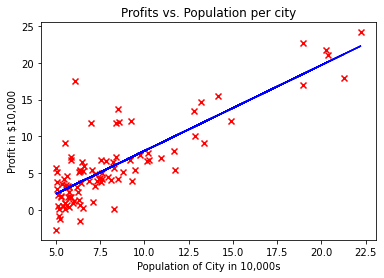

In [18]:
# Plot the linear fit
plt.plot(x_train, predicted, c = "b")

# Create a scatter plot of the data. 
plt.scatter(x_train, y_train, marker='x', c='r') 

# Set the title
plt.title("Profits vs. Population per city")
# Set the y-axis label
plt.ylabel('Profit in $10,000')
# Set the x-axis label
plt.xlabel('Population of City in 10,000s')

你的 $w,b$ 最终值也可用于预测利润。让我们预测一下在 35,000 和 70,000 人的区域中的利润是多少。

- 该模型以一个城市的 10,000 人口作为输入。

- 因此，35,000 人可以转化为模型的输入： `np.array([3.5])`

- 同样，70,000 人可以转化为模型的输入：`np.array([7.])`


In [19]:
predict1 = 3.5 * w + b
print('For population = 35,000, we predict a profit of $%.2f' % (predict1*10000))

predict2 = 7.0 * w + b
print('For population = 70,000, we predict a profit of $%.2f' % (predict2*10000))

For population = 35,000, we predict a profit of $4519.77
For population = 70,000, we predict a profit of $45342.45


**预期输出**:
<table>
  <tr>
    <td> <b> For population = 35,000, we predict a profit of<b></td>
    <td> $4519.77 </td> 
  </tr>
  
  <tr>
    <td> <b> For population = 70,000, we predict a profit of<b></td>
    <td> $45342.45 </td> 
  </tr>
</table>